# Modelos de regresión logistica


In [1]:
from IPython.display import display, Math, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/gender-purchase/Gender%20Purchase.csv"
df = pd.read_csv(url)
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [3]:
table = pd.crosstab(df["Gender"], df["Purchase"])
table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [4]:
table.sum(axis=1)

,0
Gender,
Female,265
Male,246


In [5]:
table.sum(axis=0)

,0
Purchase,
No,231
Yes,280


In [6]:
table.astype("float").div(table.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


La probabilidad condicional


In [7]:
display(Math(r'P(Purchase|Male) = \frac{Purchase \cap Male}{Male}'))

<IPython.core.display.Math object>

In [8]:
121/246

0.491869918699187

In [9]:
display(Math(r'P(\text{NoPurchase}|\text{Male}) = 1 - P(\text{Purchase}|\text{Male})'))

<IPython.core.display.Math object>

In [10]:
125/246

0.508130081300813

In [11]:
from IPython.display import display, Math, Latex
display(Math(r'P(Female|Purchase) = \frac{Female \cap Purchase}{Purchase}'))

<IPython.core.display.Math object>

In [12]:
159/280

0.5678571428571428

In [13]:
display(Math(r'P(Male|Purchase)'))

<IPython.core.display.Math object>

In [14]:
121/280

0.43214285714285716

# Regresión logistica para la toma de decisiones

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [16]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/bank/bank.csv"
df = pd.read_csv(url, sep= ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [17]:
df.shape

(4119, 21)

In [18]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [19]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
df['y'].value_counts()


,count
y,
no,3668
yes,451


In [21]:
df['y'] = (df['y'] == 'yes').astype(int)



In [22]:
df['y'].value_counts()

,count
y,
0,3668
1,451


In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [24]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [25]:
df['education']  = np.where(df['education'] == 'basic.4y', 'Basic', df['education'])
df['education']  = np.where(df['education'] == 'basic.6y', 'Basic', df['education'])
df['education']  = np.where(df['education'] == 'basic.9y', 'Basic', df['education'])

In [26]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [27]:
df['education'] = np.where(df['education'] == 'high.school', 'High School', df['education'])
df['education'] = np.where(df['education'] == 'professional.course', 'Professional', df['education'])
df['education'] = np.where(df['education'] == 'university.degree', 'University', df['education'])

In [28]:
df['education'].unique()

array(['Basic', 'High School', 'University', 'Professional', 'unknown',
       'illiterate'], dtype=object)

In [29]:
df['y'].value_counts()

,count
y,
0,3668
1,451


In [30]:
df.groupby('y').mean(numeric_only=True)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [31]:
df.groupby('education').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Professional,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


<Axes: xlabel='education'>

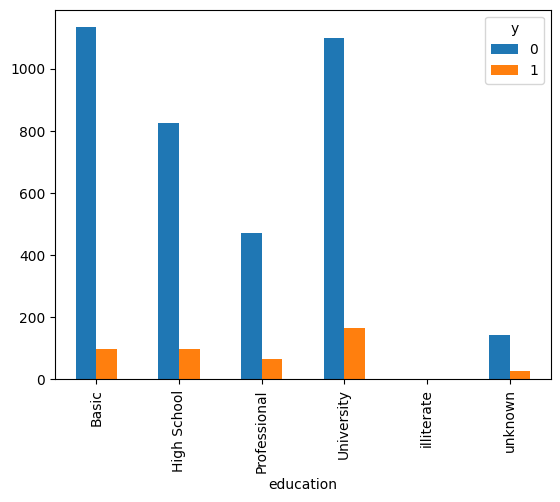

In [32]:
pd.crosstab(df['education'], df['y']).plot(kind='bar')

<Axes: xlabel='marital'>

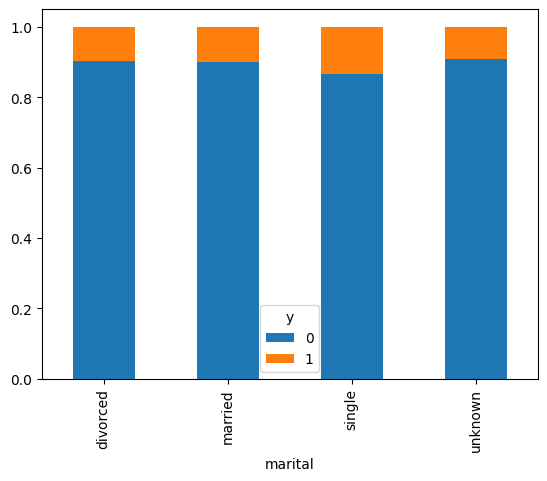

In [33]:
table = pd.crosstab(df['marital'], df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<Axes: xlabel='day_of_week'>

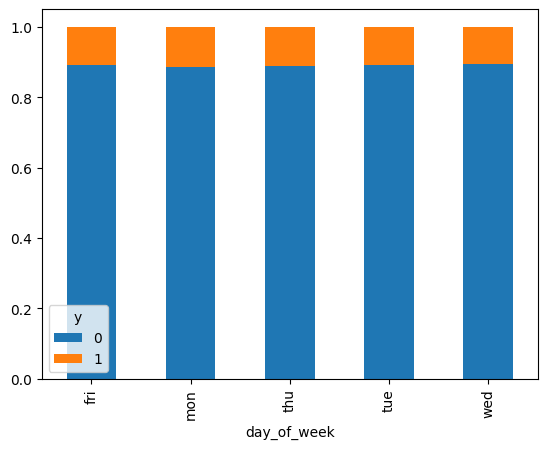

In [34]:
table = pd.crosstab(df['day_of_week'], df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<Axes: xlabel='month'>

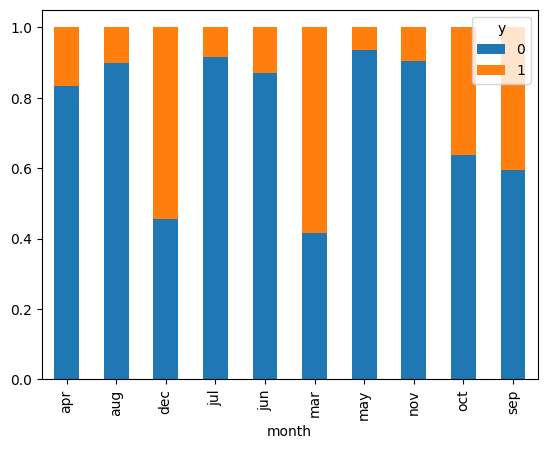

In [35]:
table = pd.crosstab(df['month'], df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<Axes: xlabel='month'>

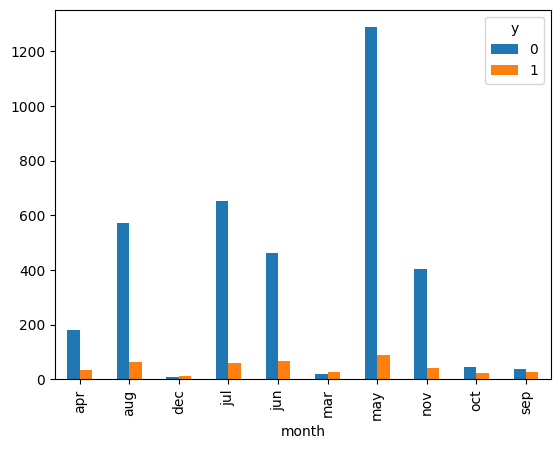

In [36]:
table.plot(kind='bar')

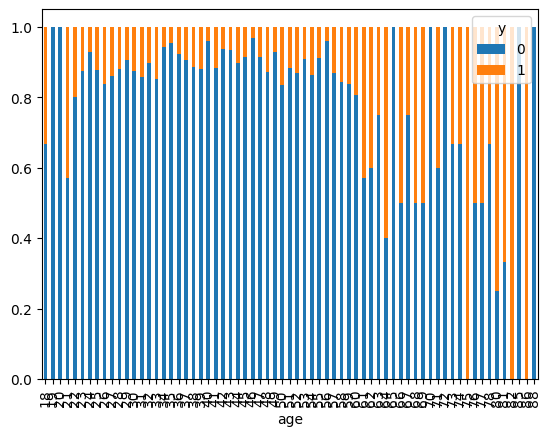

In [37]:
table = pd.crosstab(df['age'], df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

array([[<Axes: title={'center': 'age'}>]], dtype=object)

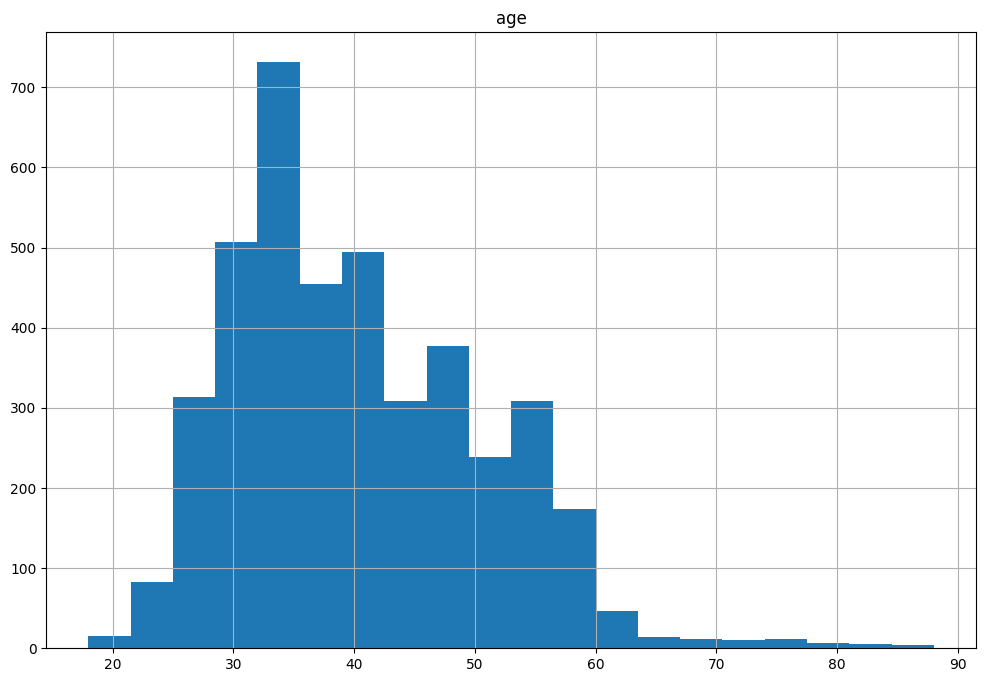

In [38]:
df.hist(column='age',  figsize=(12,8), bins=20)

<Axes: xlabel='job'>

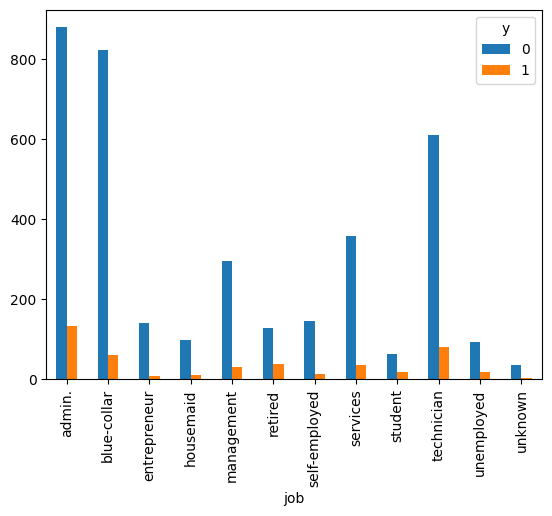

In [39]:
pd.crosstab(df['job'], df['y']).plot(kind='bar')

<Axes: xlabel='poutcome'>

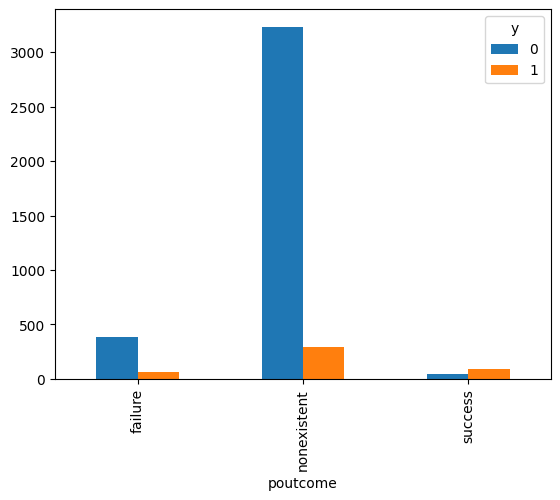

In [40]:
table = pd.crosstab(df['poutcome'], df['y'])
table.plot(kind='bar')

<Axes: xlabel='age'>

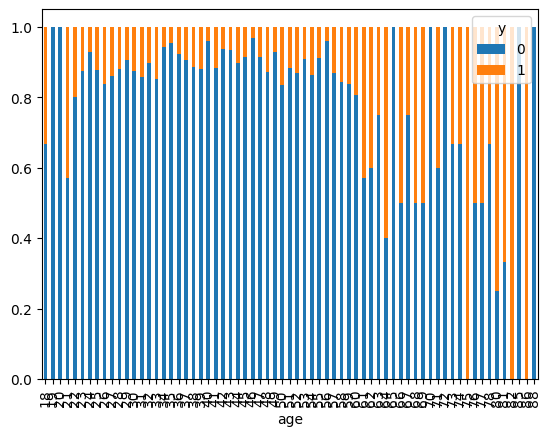

In [41]:
table = pd.crosstab(df['age'], df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Conversión de variables categoricas

In [42]:
df.columns.values



array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [43]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [44]:
df_dummies = pd.get_dummies(df, columns=categorical, drop_first=True)


In [45]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,True,False,False,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,True,False,False,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,False,True,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,True,False,False,True,False,False,False,True,False


In [46]:
df_dummies.columns.values


array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_High School',
       'education_Professional', 'education_University',
       'education_illiterate', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [47]:
Y = df_dummies['y'].values
X = df_dummies.drop('y', axis=1).values

In [48]:
n = 12


In [49]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Supongamos que ya tienes X y Y preparados
X = df_dummies.drop('y', axis=1).values
Y = df_dummies['y'].values

n = 12 # Número de características que deseas seleccionar
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=n)  # Corregido aquí
rfe.fit(X, Y)

print(rfe.support_)
print(rfe.ranking_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False  True False False False  True False False  True
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True False False False False False False
 False  True  True]
[29 28 17 37  1 16 21 19  1 26  2  1 31  1  5  1 30 34 24  6 33 15 14 39
 20  8  9 38  7 22 40 12 36  4 13  3 18  1  1  1  1  1 11 35 32 23 25 27
 10  1  1]


In [51]:

print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True False False False False False False
 False  True  True]
[29 28 17 37  1 16 21 19  1 26  2  1 31  1  5  1 30 34 24  6 33 15 14 39
 20  8  9 38  7 22 40 12 36  4 13  3 18  1  1  1  1  1 11 35 32 23 25 27
 10  1  1]


In [52]:
z  = list(zip(df_dummies.columns.values,rfe.ranking_ ))
z


[('age', 29),
 ('duration', 28),
 ('campaign', 17),
 ('pdays', 37),
 ('previous', 1),
 ('emp.var.rate', 16),
 ('cons.price.idx', 21),
 ('cons.conf.idx', 19),
 ('euribor3m', 1),
 ('nr.employed', 26),
 ('y', 2),
 ('job_blue-collar', 1),
 ('job_entrepreneur', 31),
 ('job_housemaid', 1),
 ('job_management', 5),
 ('job_retired', 1),
 ('job_self-employed', 30),
 ('job_services', 34),
 ('job_student', 24),
 ('job_technician', 6),
 ('job_unemployed', 33),
 ('job_unknown', 15),
 ('marital_married', 14),
 ('marital_single', 39),
 ('marital_unknown', 20),
 ('education_High School', 8),
 ('education_Professional', 9),
 ('education_University', 38),
 ('education_illiterate', 7),
 ('education_unknown', 22),
 ('default_unknown', 40),
 ('default_yes', 12),
 ('housing_unknown', 36),
 ('housing_yes', 4),
 ('loan_unknown', 13),
 ('loan_yes', 3),
 ('contact_telephone', 18),
 ('month_aug', 1),
 ('month_dec', 1),
 ('month_jul', 1),
 ('month_jun', 1),
 ('month_mar', 1),
 ('month_may', 11),
 ('month_nov', 35)

In [53]:
cols =  [x[0] for x in z if x[1] == 1]
cols

['previous',
 'euribor3m',
 'job_blue-collar',
 'job_housemaid',
 'job_retired',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'day_of_week_wed',
 'poutcome_nonexistent']

In [54]:
X= df_dummies[cols]
Y = df_dummies['y']

In [55]:
Y = np.asarray(Y)
X = np.asarray(X)


In [58]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Assuming X is a DataFrame and Y is a Series or array
Y = pd.Series(Y)  # Convert Y back to a pandas Series

# Convert X boolean columns to integers
X = X.astype(int)

# Check for unique values in each column of X
for col in X.columns:
    print(f"Unique values in column '{col}': {X[col].unique()}")

# Ensure Y is still numeric
print(Y.dtypes)

# Check for NaN values in X
print(X.isnull().sum())

# Handle NaN values (if any)
X = X.dropna()
Y = Y[X.index]  # Ensure Y aligns with X after dropping NaN rows

# Final type check
print(X.dtypes)  # Should show numeric types
print(Y.dtypes)  # Should be int or float

# Fit the model
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Print the summary
print(result.summary())





AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Implementar Sklearn

In [59]:
from sklearn import linear_model


In [60]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression()

In [61]:
logit_model.score(X, Y)

0.8956057295460063

In [62]:
Y.mean()

0.10949259529011895

In [63]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Validación del modelo logistico

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [65]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [66]:
probs = lm.predict_proba(X_test)
probs

array([[0.94965571, 0.05034429],
       [0.83752808, 0.16247192],
       [0.92899006, 0.07100994],
       ...,
       [0.64796655, 0.35203345],
       [0.96868457, 0.03131543],
       [0.56300527, 0.43699473]])

In [67]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] =np.where( prob_df[0] > threshold, 1, 0 )
prob_df.head()

,0,prediction
0,0.050344,0
1,0.162472,1
2,0.071010,0
3,0.062356,0
4,0.022585,0


In [69]:
pd.crosstab(prob_df["prediction"], columns ="count")

col_0,count
prediction,
0,846
1,390


In [70]:
390/len(prob_df)*100

31.55339805825243

Validación cruzada

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
scores = cross_val_score(lm, X, Y, scoring="accuracy", cv=10)
scores

array([0.90291262, 0.8907767 , 0.90291262, 0.89563107, 0.89805825,
       0.88834951, 0.88592233, 0.89563107, 0.88592233, 0.88564477])

## Matrices de confusion y ROC

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [82]:
probs = lm.predict_proba(X_test)
probs

array([[0.94965571, 0.05034429],
       [0.83752808, 0.16247192],
       [0.92899006, 0.07100994],
       ...,
       [0.64796655, 0.35203345],
       [0.96868457, 0.03131543],
       [0.56300527, 0.43699473]])

In [83]:
probs = probs[:, 1]
prob_df = pd.DataFrame(probs)
threshold = 0.1
prob_df["prediction"] =np.where( prob_df[0] > threshold, 1, 0 )
prob_df["Actual"] = list(Y_test)
prob_df.head()

,0,prediction,Actual
0,0.050344,0,0
1,0.162472,1,0
2,0.071010,0,0
3,0.062356,0,0
4,0.022585,0,0


In [84]:
confussion = pd.crosstab(prob_df["prediction"], prob_df["Actual"])
confussion

Actual,0,1
prediction,,
0,806,40
1,308,82


In [85]:
from sklearn import metrics
print(metrics.classification_report(Y_test, prob_df["prediction"]))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1114
           1       0.21      0.67      0.32       122

    accuracy                           0.72      1236
   macro avg       0.58      0.70      0.57      1236
weighted avg       0.88      0.72      0.77      1236



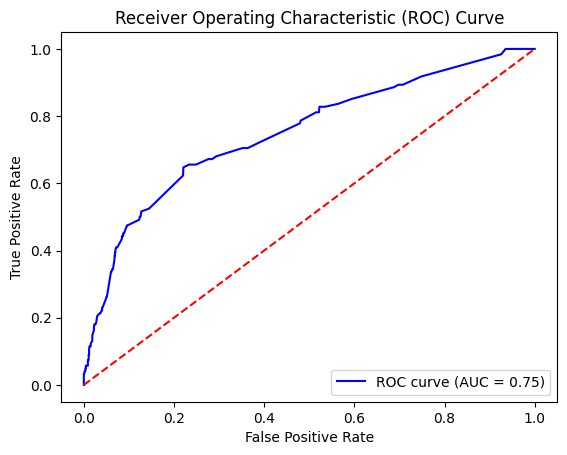

In [95]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Obtener el FPR (False Positive Rate), TPR (True Positive Rate) y los thresholds
fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs)

# Calcular el AUC (Area Under the Curve)
auc = metrics.roc_auc_score(Y_test, probs)

# Crear el gráfico de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')

# Añadir una línea diagonal (representa una predicción aleatoria)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()



